<a href="https://colab.research.google.com/github/naokityokoyama/Projetos_Data_Science/blob/main/Black_Friday.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data
*   Variable | Definition
*   User_ID | User ID
*   Product_ID | Product ID
*   Gender | Sex of User
*   Age | Age in bins
*   Occupation | Occupation (Masked)
*   City_Category | Category of the City (A,B,C)
*   Stay_In_Current_City_Years | Number of years stay in current city
*   Marital_Status | Marital Status
*   Product_Category_1 | Product Category (Masked)
*   Product_Category_2 | Product may belongs to other category also (Masked)
*   Product_Category_3 | Product may belongs to other category also (Masked)
*   Purchase | Purchase Amount (Target Variable)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_train = pd.read_csv('/content/train.csv')


In [142]:
data_test.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN


In [92]:
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category_1,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Product_Category_2,376430.0,9.842329e+00,5.086590,2.0,5.0,9.0,15.0,18.0
Product_Category_3,166821.0,1.266824e+01,4.125338,3.0,9.0,14.0,16.0,18.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [4]:
#retirando a letra "P"
data_train['Product_ID'] = data_train['Product_ID'].apply(lambda x: x[1:]) 


In [94]:
data_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
data_train['Product_ID']=data_train['Product_ID'].astype(int)


In [6]:
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Product_ID,550068.0,1.747448e+05,102746.516956,142.0,97142.0,169742.0,259142.0,375436.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category_1,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Product_Category_2,376430.0,9.842329e+00,5.086590,2.0,5.0,9.0,15.0,18.0
Product_Category_3,166821.0,1.266824e+01,4.125338,3.0,9.0,14.0,16.0,18.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [97]:
data_train['Product_Category_3'].value_counts()

16.0    32636
15.0    28013
14.0    18428
17.0    16702
5.0     16658
8.0     12562
9.0     11579
12.0     9246
13.0     5459
6.0      4890
18.0     4629
4.0      1875
11.0     1805
10.0     1726
3.0       613
Name: Product_Category_3, dtype: int64

In [7]:
n_rows = data_train.shape[0]
print (f'Total de linhas/Observações {n_rows}')

Total de linhas/Observações 550068


In [8]:
#quantidade de usuarios
usuarios = len(data_train['User_ID'].value_counts().index)
print (f'A Quantidade de usuario é {usuarios}')

A Quantidade de usuario é 5891


In [9]:
#quantidade de produtos
produtos = len(data_train['Product_ID'].value_counts().index)
print (f'A Variedade de produtos é {produtos}')

A Variedade de produtos é 3631


In [10]:
data_train['Product_ID'].describe()

count    550068.000000
mean     174744.814667
std      102746.516956
min         142.000000
25%       97142.000000
50%      169742.000000
75%      259142.000000
max      375436.000000
Name: Product_ID, dtype: float64

In [11]:
prod2 = data_train['Product_Category_2'].isnull().sum()
prod3 = data_train['Product_Category_3'].isnull().sum()

print (f'Nulos produtos 2 {prod2} e Nulos produtos 3 {prod3}')

Nulos produtos 2 173638 e Nulos produtos 3 383247


In [12]:
print (f'Dados validos em produtos 2 {n_rows-prod2} Dados validos em produtos 3 {n_rows-prod3}')
print (f'Dados validos em produtos 2 % {prod2/n_rows:.2f} Dados validos em produtos 3 % {prod3/n_rows:.2f}')

Dados validos em produtos 2 376430 Dados validos em produtos 3 166821
Dados validos em produtos 2 % 0.32 Dados validos em produtos 3 % 0.70


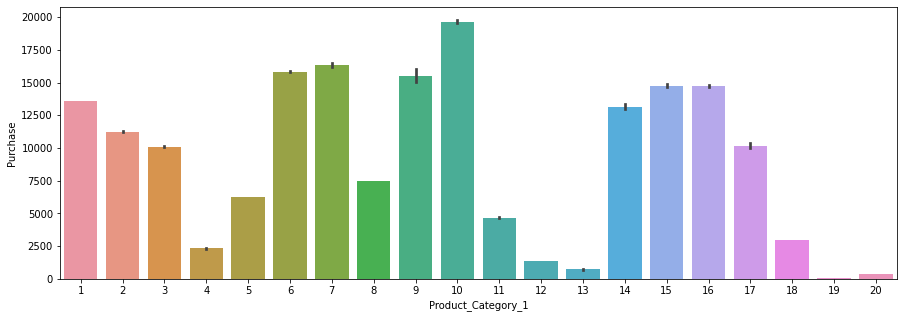

In [13]:
plt.figure(figsize=(15,5))
sns.barplot(data=data_train, x=data_train['Product_Category_1'], y=data_train['Purchase'])

In [14]:
data_train = data_train.drop(['Product_Category_3'], axis=1)
data_train = data_train.drop(['Product_Category_2'], axis=1)


In [15]:
#Gender
trocar_Gender = {'F': 0, 'M':1}

data_train['Gender'] = data_train['Gender'].map(trocar_Gender)


In [16]:
data_train.Age.unique()

trocar_age = {'0-17':0, '55+':1, '26-35':2, '46-50':3, '51-55':4, '36-45':5, '18-25':6}
data_train['Age'] = data_train['Age'].map(trocar_age)


In [17]:
data_train.City_Category.unique()

trocar_City_categoria = {'A':0, 'C':1, 'B':2}
data_train['City_Category'] = data_train['City_Category'].map(trocar_City_categoria)


In [18]:
data_train.Stay_In_Current_City_Years.unique()

trocar_Stay = {'2':2, '4+':4, '3':3, '1':1, '0':0}
data_train['Stay_In_Current_City_Years'] = data_train['Stay_In_Current_City_Years'].map(trocar_Stay)


In [150]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   User_ID                     550068 non-null  int64
 1   Product_ID                  550068 non-null  int64
 2   Gender                      550068 non-null  int64
 3   Age                         550068 non-null  int64
 4   Occupation                  550068 non-null  int64
 5   City_Category               550068 non-null  int64
 6   Stay_In_Current_City_Years  550068 non-null  int64
 7   Marital_Status              550068 non-null  int64
 8   Product_Category_1          550068 non-null  int64
 9   Purchase                    550068 non-null  int64
dtypes: int64(10)
memory usage: 42.0 MB


## Machine Learning

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate


In [20]:
X = data_train.drop('Purchase', axis=1)
y = data_train.Purchase


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=41)

In [22]:
rf = RandomForestRegressor(verbose=True)
rf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.9min finished


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=True, warm_start=False)

In [23]:
rf.score(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   33.0s finished


0.9582604534668835

In [24]:
rf.score(X_test, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   11.3s finished


0.6993215948274573

In [50]:
# Gradient Boost e Random Forest
gb = GradientBoostingRegressor(verbose=True)
rf = RandomForestRegressor(verbose=True)

In [48]:
#Cross Validation
scoring = 'r2'
cv = 5

In [25]:
crossRF= cross_validate(rf, X, y, cv=cv, scoring=scoring)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  4.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    8.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  4.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    7.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  4.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    7.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

In [42]:
crossRF['test_score'].mean()

0.6985818400703117

In [51]:
crossGrad = cross_validate(gb, X, y , cv=cv, scoring=scoring)

      Iter       Train Loss   Remaining Time 
         1    23223758.2227           58.98s
         2    21496336.5911           59.16s
         3    20174715.8819           59.00s
         4    18889013.4838           58.87s
         5    17847479.8566           58.35s
         6    17022919.2004           57.94s
         7    16267470.7348           56.81s
         8    15651683.9063           55.94s
         9    15101000.2534           55.30s
        10    14651304.8037           54.60s
        20    10896246.4205           47.51s
        30     9704465.9206           41.53s
        40     9218359.0299           35.45s
        50     8975212.2095           29.46s
        60     8835054.8986           23.53s
        70     8752641.0475           17.62s
        80     8680855.5416           11.72s
        90     8626092.8756            5.88s
       100     8562370.9307            0.00s
      Iter       Train Loss   Remaining Time 
         1    23233651.8689            1.01m
        

In [53]:
crossGrad['test_score'].mean()

0.6572755179624438